In [2]:
import pandas as pd
import os

paths = ["air/openweathermap", "weather/openmeteo", "weather/openweathermap"]
filesets = {}
for path in paths:
    files = os.listdir(f"../data/{path}")
    print(files)
    filesets[path] = set(files)
print("Consistent station ids:", filesets[paths[0]] == filesets[paths[1]] == filesets[paths[2]])
print("Number of stations:", len(filesets[paths[0]]))

['10005.csv', '10018.csv', '10030.csv', '10058.csv', '10059.csv', '10060.csv', '10115.csv', '10119.csv', '10120.csv', '10121.csv', '10122.csv', '10123.csv', '10124.csv', '10125.csv', '10126.csv', '10139.csv', '10140.csv', '10141.csv', '10158.csv', '10374.csv', '10414.csv', '10438.csv', '10446.csv', '10447.csv', '10455.csv', '10456.csv', '10554.csv', '10694.csv', '10794.csv', '10814.csv', '10834.csv', '10854.csv', '10874.csv', '109.csv', '10934.csv', '10955.csv', '10956.csv', '11.csv', '11154.csv', '11174.csv', '11195.csv', '11234.csv', '11254.csv', '11278.csv', '11294.csv', '11301.csv', '11303.csv', '11336.csv', '11358.csv', '11360.csv', '11362.csv', '114.csv', '11434.csv', '11455.csv', '11457.csv', '115.csv', '11554.csv', '11616.csv', '117.csv', '11754.csv', '11794.csv', '11814.csv', '11855.csv', '11916.csv', '11934.csv', '12016.csv', '12038.csv', '12050.csv', '12054.csv', '12055.csv', '12098.csv', '12100.csv', '12138.csv', '12139.csv', '122.csv', '129.csv', '134.csv', '142.csv', '143

In [14]:
from collections import defaultdict

files = filesets[paths[0]]
for path in paths:
    first_timestamp = defaultdict(int)
    last_timestamp = defaultdict(int)
    row_count = defaultdict(int)
    for file in files:
        df = pd.read_csv(f"../data/{path}/{file}")
        df = df.dropna()
        first_timestamp[df["datetime"].min()]+=1
        last_timestamp[df["datetime"].max()]+=1
        row_count[df.shape[0]]+=1

    print(f"[{path}]")
    print("First timestamp:", dict(first_timestamp))
    print("Last timestamp:", dict(last_timestamp))
    print("Row count:", dict(row_count))
    print()

[air/openweathermap]
First timestamp: {'2023-06-30T22:00:00Z': 287}
Last timestamp: {'2023-09-29T22:00:00Z': 287}
Row count: {2185: 287}

[weather/openmeteo]
First timestamp: {'2023-06-30T22:00:00Z': 287}
Last timestamp: {'2023-09-30T21:00:00Z': 287}
Row count: {2208: 287}

[weather/openweathermap]
First timestamp: {'2023-06-30T22:00:00Z': 287}
Last timestamp: {'2023-09-30T21:00:00Z': 287}
Row count: {2208: 287}



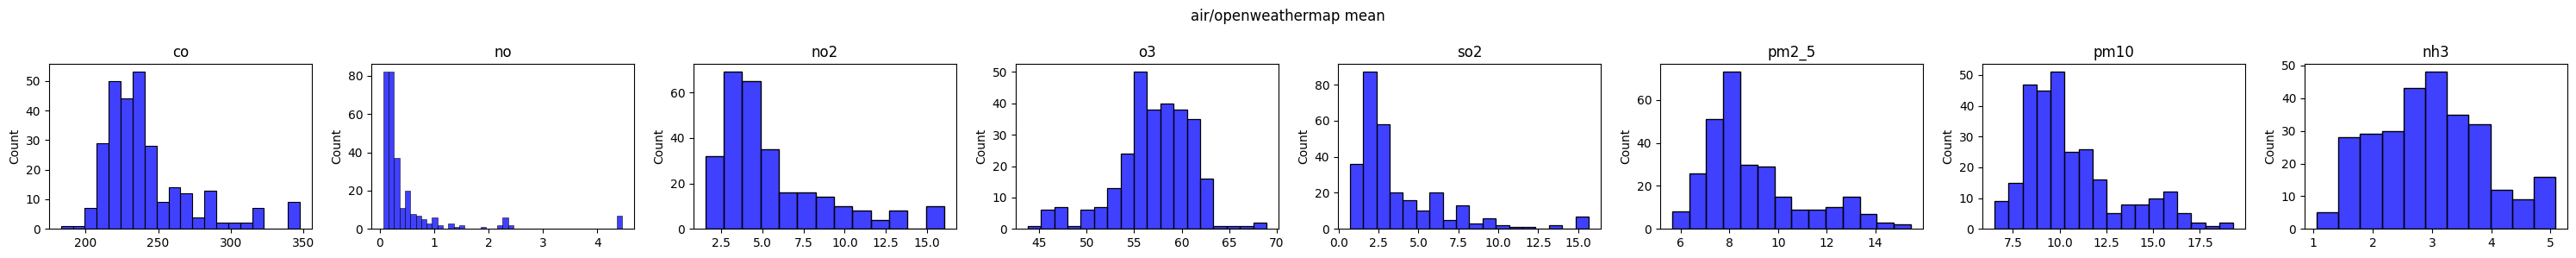

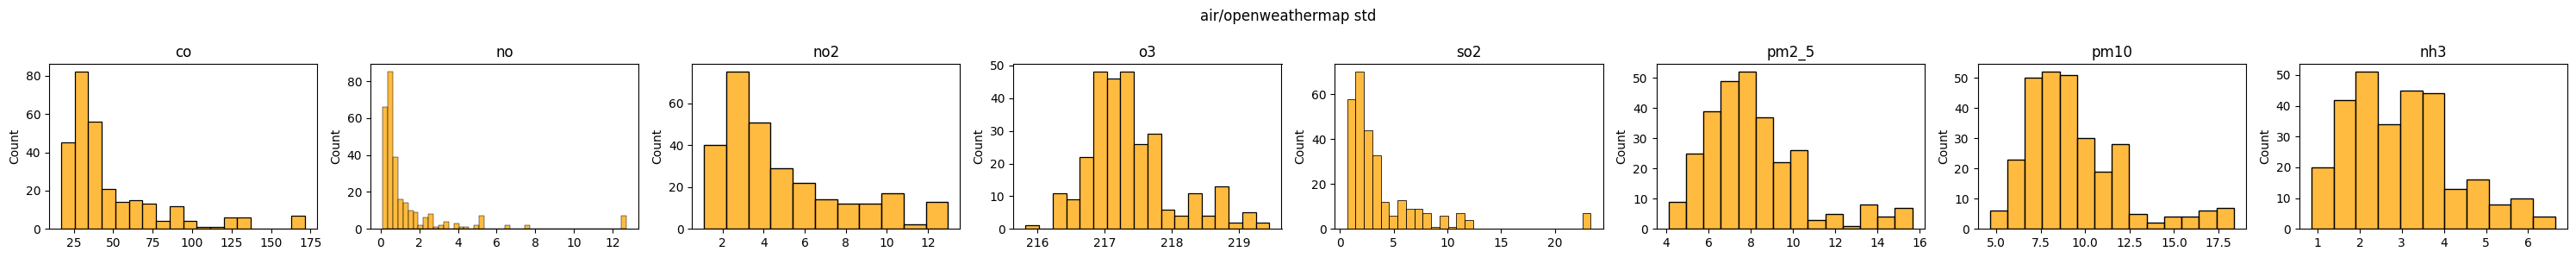

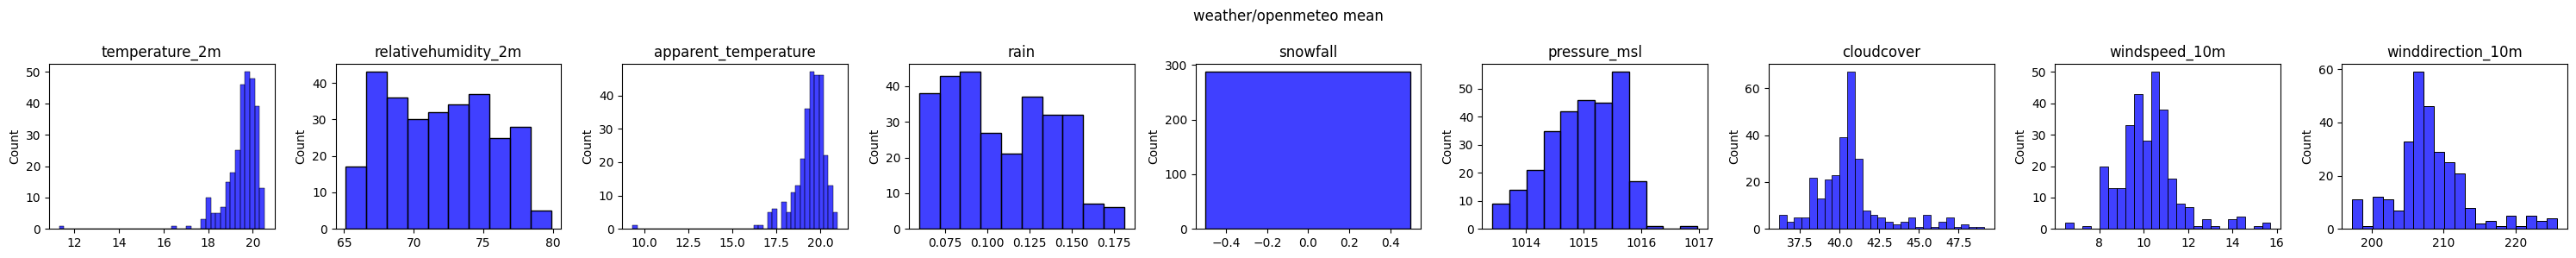

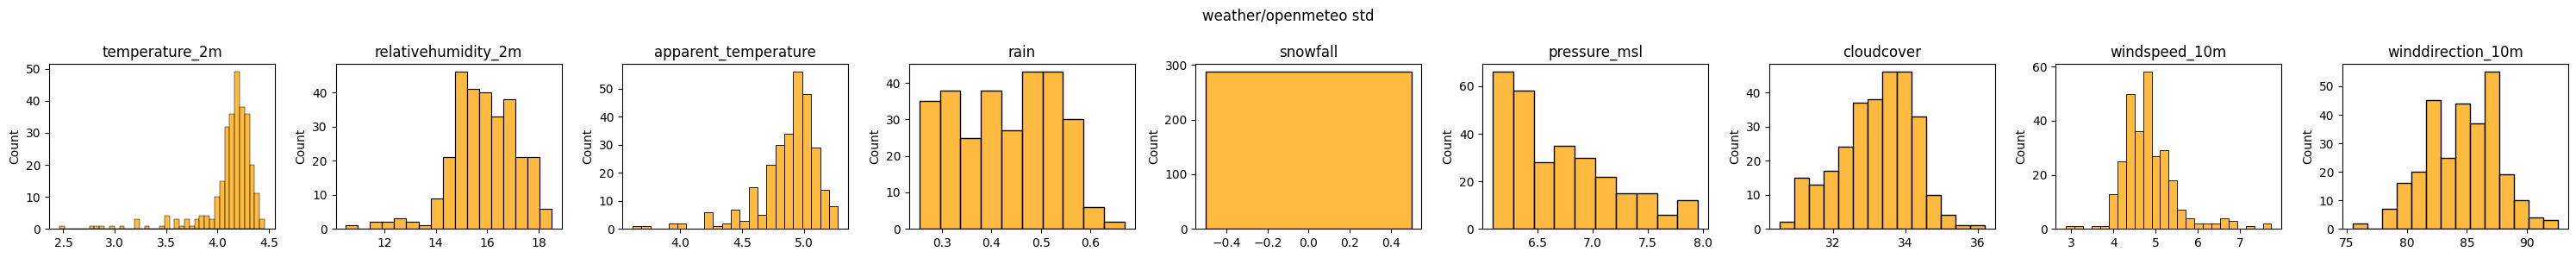

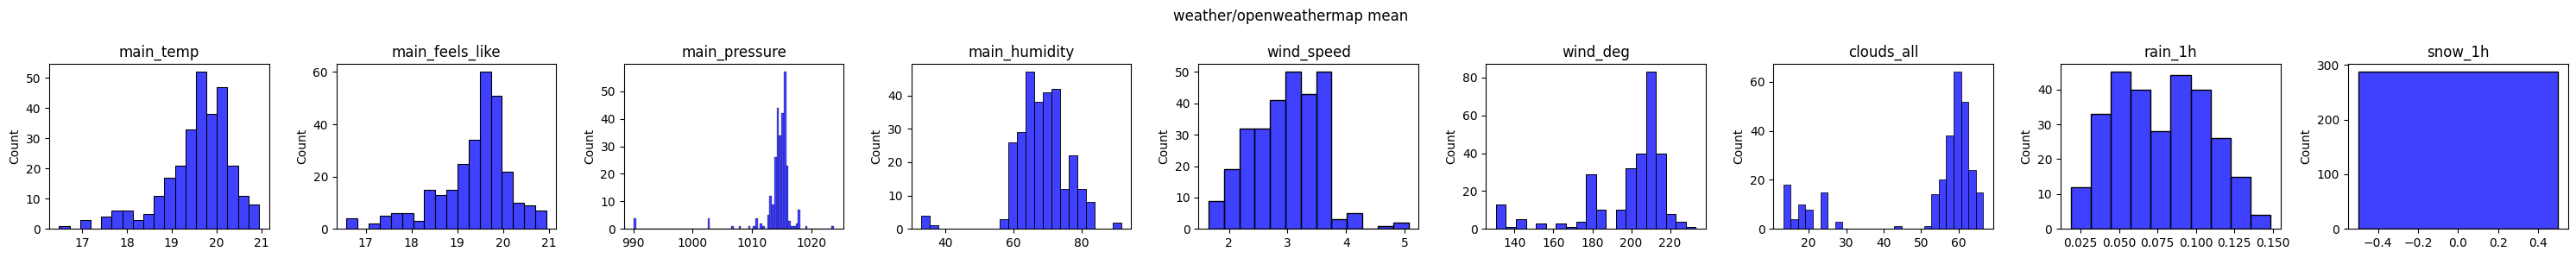

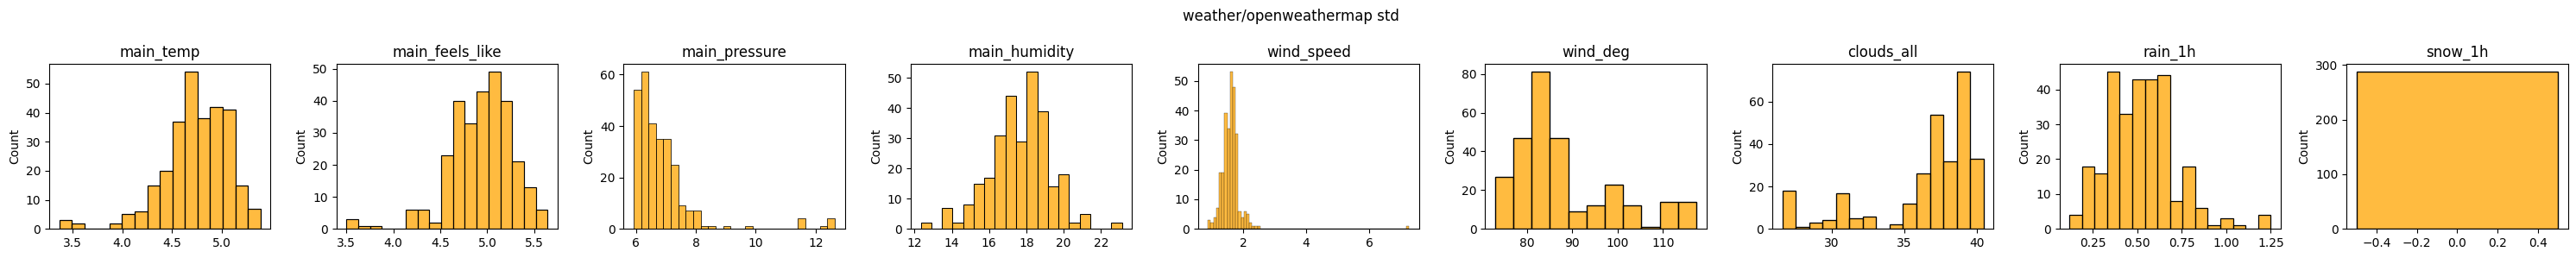

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

for path in paths:
    avg = defaultdict(list)
    std = defaultdict(list)
    for file in files:
        df = pd.read_csv(f"../data/{path}/{file}")
        df = df.dropna()
        for col in df.columns:
            if col == "datetime":
                continue
            avg[col].append(df[col].mean())
            std[col].append(df[col].std())

    for data, label, color in [(avg, "mean", "blue"), (std, "std", "orange")]:
        fig, ax = plt.subplots(1, len(df.columns)-1, figsize=(30, 3))
        i = 0
        for col in df.columns:
            if col == "datetime":
                continue
            sns.histplot(data[col], ax=ax[i], color=color)
            ax[i].set_title(col)
            i += 1
        plt.suptitle(f"{path} {label}")
        plt.tight_layout()
        plt.show()
    print("\n")

In [4]:
total_invalid_rows = 0
for path in paths:
    for file in files:
        df = pd.read_csv(f"../data/{path}/{file}")
        df = df[df["datetime"] <= "2023-09-29T22:00:00Z"]
        total_invalid_rows += df.shape[0] - df.dropna().shape[0]
print("Total invalid rows:", total_invalid_rows)

Total invalid rows: 0
